### **Problem Statement:**
####Which type of shows/movies to produce and how they can grow the business in different countries.

### **Objective:**
####Understand what content works best and where, so Netflix can make better production and growth decisions

### **1. Import Required Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **2. Loading the Data**

In [5]:
df = pd.read_csv('netflix.csv')

### **3. Basic Data Analysis**

#### Shape of the data

In [3]:
df.shape

(8807, 12)

#### Top 2 records of my dataframe

In [18]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."


#### Data types of each column

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### Missing values

In [9]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


#### Outlier Check

##### Release Year

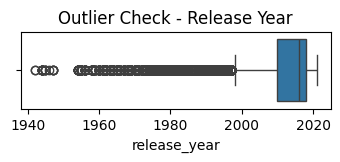

In [38]:
plt.figure(figsize=(4,1))
sns.boxplot(x=df['release_year'])
plt.title("Outlier Check - Release Year")
plt.show()

###### Insights:

*   Mostly, data is concentrated after 2000.



#### Unique values per column

In [10]:
df.nunique()

,0
show_id,8807
type,2
title,8807
director,4528
cast,7692
country,748
date_added,1767
release_year,74
rating,17
duration,220


#### Value counts of important columns

In [11]:
df['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


In [12]:
df['rating'].value_counts()

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


#### Count number of duplicate rows

In [14]:
df.duplicated().sum()

np.int64(0)

#### Statistical Summary

In [26]:
df.describe()

,release_year
count,63519.000000
mean,2012.298320
std,9.344339
min,1942.000000
25%,2010.000000
50%,2016.000000
75%,2018.000000
max,2021.000000


### **Preprocessing**

#### Preprocess cast

In [22]:
# Handle missing values first (replace NaN with empty string)
df['cast'] = df['cast'].fillna('')

# Split actors by comma
df['cast'] = df['cast'].str.split(',')

# Explode into separate rows
df = df.explode('cast')

# Clean whitespace
df['cast'] = df['cast'].str.strip()

# Remove empty strings after explosion
df = df[df['cast'] != '']

#### Preprocess Director

In [24]:
# Handle missing values
df['director'] = df['director'].fillna('')

# Split directors by comma
df['director'] = df['director'].str.split(',')

# Explode into separate rows
df = df.explode('director')

# Clean whitespace
df['director'] = df['director'].str.strip()

# Remove empty strings
df = df[df['director'] != '']

#### Preprocessing for country

In [25]:
# Handle missing values first (replace NaN with empty string)
df['country'] = df['country'].fillna('')

# Split by comma
df['country'] = df['country'].str.split(',')

# Explode into separate rows
df = df.explode('country')

# Clean whitespace
df['country'] = df['country'].str.strip()

# Remove empty strings
df = df[df['country'] != '']

### **4. Exploratory Data Analysis**

####**Univariate Analysis**

#### Movies vs TV Shows

In [6]:
df['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


/tmp/ipython-input-2163801809.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="type", palette="Set2")


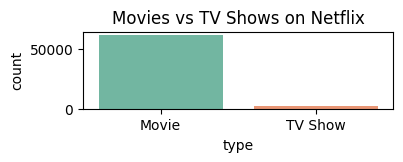

In [39]:
plt.figure(figsize=(4,1))
sns.countplot(data=df, x="type", palette="Set2")
plt.title("Movies vs TV Shows on Netflix")
plt.show()

##### Insights:

*   There are almost twice as many Movies as TV Shows.



#### Top 10 Countries

In [28]:
print("\nTop 10 countries:\n", df['country'].value_counts().head(10))


Top 10 countries:
 country
United States     23448
India              8116
United Kingdom     4201
Canada             2884
France             2834
Germany            1559
Japan              1551
Spain              1489
China              1039
Nigeria             891
Name: count, dtype: int64


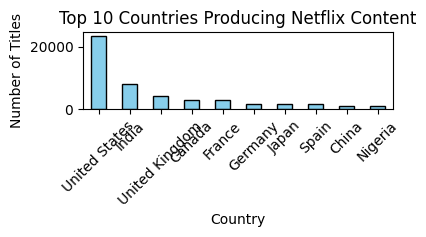

In [40]:
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(4,1))
top_countries.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()

##### Insights:

*   The United States is the leading producer of Netflix content, followed by India and the UK.
*   Countries like Japan and South Korea are also emerging, showing Netflix’s focus on global and regional content expansion.




#### Top 10 genres

In [9]:
df['listed_in'] = df['listed_in'].str.split(',')   # split by comma
df_exploded = df.explode('listed_in')              # make multiple rows
df_exploded['listed_in'] = df_exploded['listed_in'].str.strip()  # remove spaces

In [10]:
top_genres = df_exploded['listed_in'].value_counts().head(10)
print(top_genres)

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


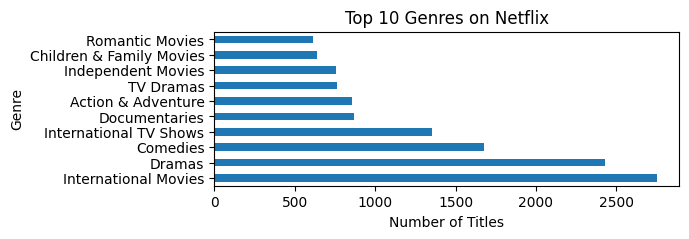

In [43]:
top_genres.plot(kind="barh", figsize=(6,2))
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

##### Insights:

*   International Movies and Dramas dominate Netflix's catalog, showing the platform's global audience reach.
*   Comedies and Action & Adventure are also very popular, indicating demand for both light-hearted and high-energy content.



####  Trend of releases by year

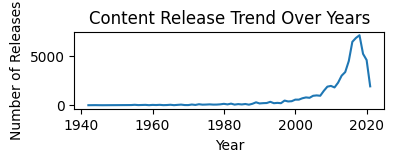

In [44]:
df['release_year'].value_counts().sort_index().plot(kind="line", figsize=(4,1))
plt.title("Content Release Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Releases")
plt.show()

##### Insights:

*   Netflix content increased slowly in the early years.
*   It grew very fast after 2010.
*   The highest releases were around 2017-2019.
*   After 2020, releases became fewer.




#### **Bivariate Analysis**

#### Movies vs TV Shows by Top 5 Countries

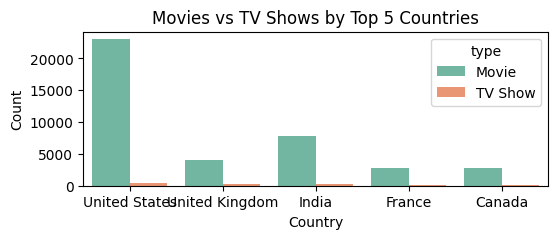

In [46]:
top5_countries = df['country'].value_counts().head(5).index

plt.figure(figsize=(6,2))
sns.countplot(data=df[df['country'].isin(top5_countries)],
              x="country", hue="type", palette="Set2")
plt.title("Movies vs TV Shows by Top 5 Countries")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

###### Insights:
*   In almost all top 5 countries, movies are produced more than TV shows.
*   The USA dominates both movies and TV shows, making it the largest content producer.
*   India mainly contributes movies, with very few TV shows.
*   UK and Canada show a more balanced share of movies and TV shows compared to India.
*   Japan produces fewer movies but a noticeable number of TV shows (likely anime/series).

👉 This means Netflix can focus more on TV shows in India (to balance content) and invest more in Japanese shows, since they are popular globally.

#### Content Production Trend in Top 5 Countries

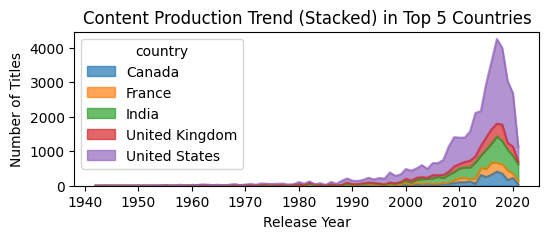

In [48]:
top_countries = df['country'].value_counts().head(5).index

trend = df[df['country'].isin(top_countries)]

trend = trend.groupby(['country', 'release_year']).size().reset_index(name='count')

trend_area = trend.pivot(index="release_year", columns="country", values="count").fillna(0)

trend_area.plot(kind="area", figsize=(6,2), stacked=True, alpha=0.7)
plt.title("Content Production Trend (Stacked) in Top 5 Countries")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()

##### Insights:

*   The USA is the biggest contributor of Netflix content.
*   After 2015, other countries like India, UK, Canada, and Japan also started producing more shows and movies.
*   From 2016 onwards, Netflix’s global content production increased rapidly.
*   This shows Netflix’s strategy to expand worldwide and attract audiences from different regions.








### **5. Insights**

1. USA makes the most content, followed by India and the UK.
2. Drama, Comedy, and Documentaries are the most popular genres.
3. Netflix’s content grew fast after 2010 and was highest around 2017–2019.
4. Movies are more than TV shows, but both are important for growth.






### **6. Recommendations**

1. Add more TV shows along with movies to keep viewers engaged.
2. Focus more on regional/local content (like India) to grow globally.
3. Make more variety in genres (thriller, kids) to reach new audiences.
4. Keep a steady flow of new content every year instead of ups and downs.